* Similar with CompareDiffRiverFlow notebook, except the threshold of transition from near to far field changed to (Rmix(wind)-Rmix(tide))/Rmix(all)>=0.1 here.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools)
import datetime, os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import StraTimeSeries as sts
import DetermineEdgePlume as DEP
import R_mixStuff as RS
from R_mixStuff import sites
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
%matplotlib inline

In [2]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]
## tmask
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
tmask = mesh.variables['tmask'][0,:,380:510,240:397]
np_mask = np.abs(1-tmask) 

In [3]:
## load grid_T model results
octriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_T.nc')
mayriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_T.nc')
janriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_T.nc')
mayall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_T.nc')
janall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_T.nc')

octnowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_T.nc')
maynowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_T.nc')
jannowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_T.nc')

octnotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_T.nc')
maynotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_T.nc')
jannotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_T.nc')
maynof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_T.nc')
jannof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_T.nc')

In [4]:
## load grid_U model results
octriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_U.nc')
mayriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_U.nc')
janriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_U.nc')
mayall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_U.nc')
janall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_U.nc')

octnowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_U.nc')
maynowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_U.nc')
jannowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_U.nc')

octnotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_U.nc')
maynotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_U.nc')
jannotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_U.nc')
maynof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_U.nc')
jannof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_U.nc')

In [5]:
## load grid_V model results
octriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_V.nc')
mayriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_V.nc')
janriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_V.nc')
mayall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_V.nc')
janall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_V.nc')

octnowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_V.nc')
maynowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_V.nc')
jannowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_V.nc')

octnotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_V.nc')
maynotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_V.nc')
jannotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_V.nc')
maynof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_V.nc')
jannof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_V.nc')

* look at transition of near and far-field during weak wind, moderate wind and high wind under different river flow scenarios.

In [6]:
def get_Rmix(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,dep_ind):
    """This function was made to get the time averaged Rmix"""
    rmix = {};
    for grid_T,st,in zip([gridT1,gridT2,gridT3,gridT4,gridT5],['onlyriver','river+tides',\
                        'river+winds','nof','all']):
        S = grid_T.variables['vosaline']
        lon = grid_T.variables['nav_lon']
        dep = grid_T.variables['deptht']

        S_ave = np.nanmean(S[tst:ted+1],axis = 0)
        rmix[st] = RS.R_mixAve(S_ave,np_mask,dep_ind)
    return rmix

In [7]:
def threshold_near_far(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,np_mask,dep_ind):
    """This function is made to select the 
    transition from near to far field in the plume by
    criteria of Rmix(river+wind)/Rmix(all) >=0.9 and 
    Rmix(river+tide)/Rmix(all) <=0.7"""
    far_rmix_wind = [];
    far_rmix_tide = [];
    far_lon = []; iss =[];
    lon = gridT5.variables['nav_lon']
    f, rmix = RS.plot_Rmix_together(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,np_mask,dep_ind)
    fig, ax = plt.subplots(1,1,figsize = (14,3))
    for i in np.arange(4,70):
        #if (rmix['river+winds'][36,i]/rmix['all'][36,i] >= 0.9) and \
        #(rmix['river+tides'][36,i]/rmix['all'][36,i] <= 0.7):
        if (rmix['river+winds'][36,i] - rmix['river+tides'][36,i])/rmix['all'][36,i]>=0.1:
            ax.plot(lon[36,i],rmix['river+winds'][36,i],'g*',markersize = 10)
            ax.plot(lon[36,i],rmix['all'][36,i],'y*',markersize = 10)
            ax.plot(lon[36,i],rmix['river+tides'][36,i],'b*',markersize = 10)
            far_rmix_wind.append(rmix['river+winds'][36,i])
            far_rmix_tide.append(rmix['river+tides'][36,i])
            far_lon.append(lon[36,i])
            iss.append(i)
    ax.set_xlim([-123.55,-123.15])
    return far_rmix_wind,far_rmix_tide,far_lon,iss

In [8]:
def determine_plume_method2_onlysalinity(grid_T,tst,ted,dep_ind):
    """Similar to method1, but this time the S_ref is the spatial mean 
    of the 2.5*2.5 km in the northern of my subdomain and not plot them, only get the
    threshold salinity"""
    S = grid_T.variables['vosaline']
    lon = grid_T.variables['nav_lon']
    lat = grid_T.variables['nav_lat']
    S_aveN = np.nanmean(S[tst:ted,:,-5:,0:5],axis = 0) ## first temporal average of northern region
    S_ref = np.nanmean(S_aveN[dep_ind]) ## then spatial average
    S_thre = 1.14*S_ref-4.8
    S_aveW = np.nanmean(S[tst:ted,dep_ind],axis = 0) ## temporal averaged of the whole domain
    S_aveW = np.ma.masked_values(S_aveW, 0) ## mask 0 value
    return S_thre, S_aveW

In [18]:
def threshold_whole_domain2(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind,dep):
    """This is another criteria for determine near of far field
        (Rmix(wind)-Rmix(tide))/Rmix(all)>0.1 then far field"""
    rmix = get_Rmix(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind)
    threshold = (rmix['river+winds'] - rmix['river+tides'])/rmix['all']
    lon = all_T.variables['nav_lon']
    lat = all_T.variables['nav_lat']
    levels = [-0.2,-0.1,0,0.1,0.2,0.3]
    origin = 'lower';
    fig, ax = plt.subplots(1,1,figsize = (8,5))
    CS = ax.contourf(lon[:],lat[:],threshold[:],levels,cmap = 'jet',origin=origin,extend='both')
    CS2 = ax.contour(CS,levels=CS.levels,colors = 'k', origin=origin,hold='on',linewidths=(2,))
    #plt.clabel(CS2,fmt='%2.1f', colors='g',fontsize = 14)
    cbar = fig.colorbar(CS,ax = ax)
    cbar.add_lines(CS2)
    cbar.set_label('Rmix')
    ## plot plume edge on top of the different plume regions
    S_thre,W = determine_plume_method2_onlysalinity(all_T,tst,ted,dep)
    CS3 = ax.contour(lon[:],lat[:],W, levels = [S_thre-4,S_thre-2,S_thre,S_thre+2], colors='cyan',linewidths=(2,))
    CS3.collections[-2].set_linewidth(3.5) 
    plt.clabel(CS3,fmt='%2.1f', colors='k',fontsize = 14)
    viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
    viz_tools.plot_coastline(ax, grid6, coords = 'map')
    ax.set_xlim([-124.,-122.8])
    ax.set_ylim([48.9,49.5])

* weak wind

S_ref 26.6485
S_thre 25.5792752838
i,lon,real salinity 12 -123.475 16.6677
i,lon,real salinity 13 -123.47 16.4818
i,lon,real salinity 50 -123.277 16.7962
i,lon,real salinity 63 -123.21 16.561
S_ref 18.7855
S_thre 16.6154542923
i,lon,real salinity 25 -123.407 24.0631
S_ref 25.2179
S_thre 23.9484008789


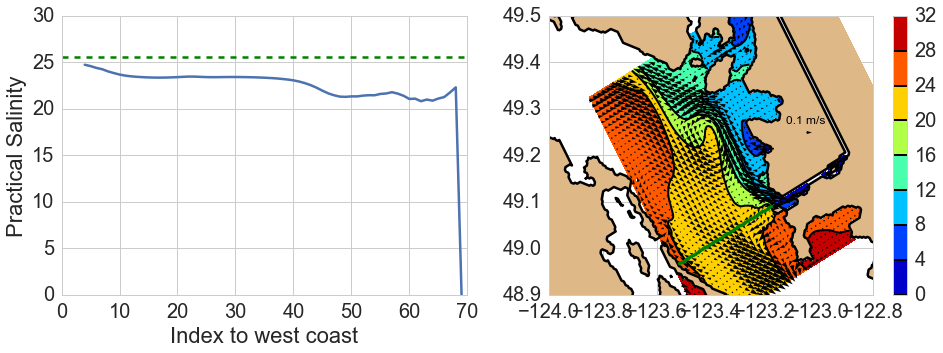

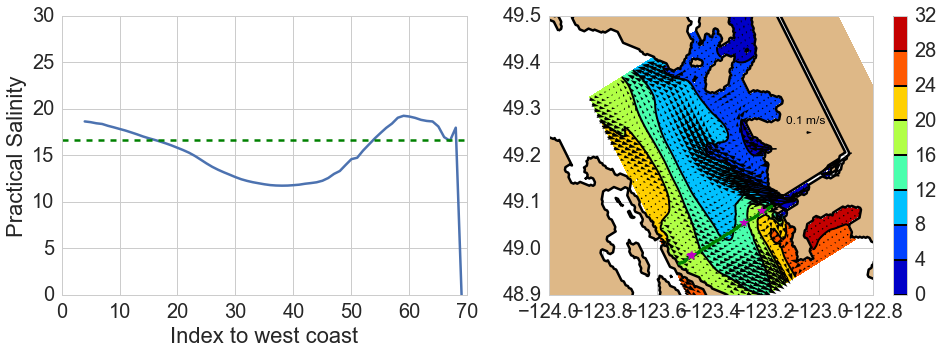

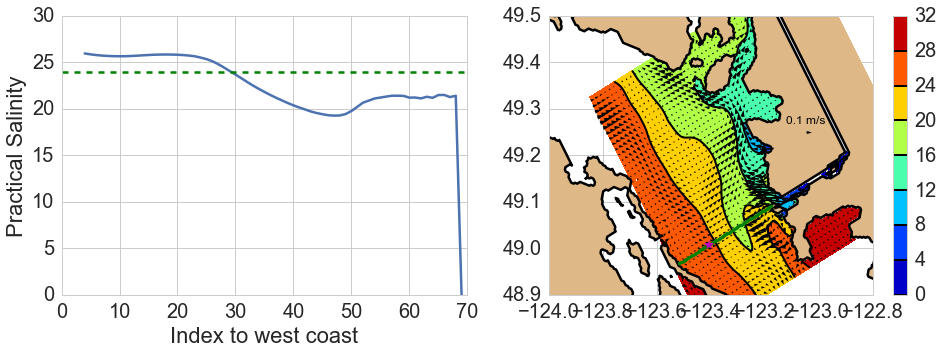

In [9]:
DEP.determine_plume_method2(octall_T,octall_U,octall_V,48,143,0,0.2) ## Oct 2~5, neap tides
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,192,263,0,0.2) ## May 9~11, spring tides
DEP.determine_plume_method2(janall_T,janall_U,janall_V,168,239,0,0.2) ## Jan 8~10, late neap early spring 

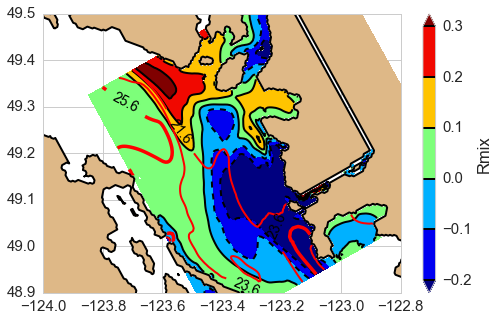

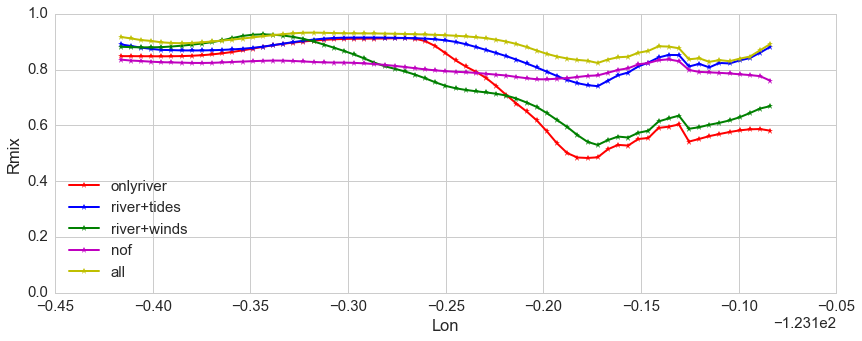

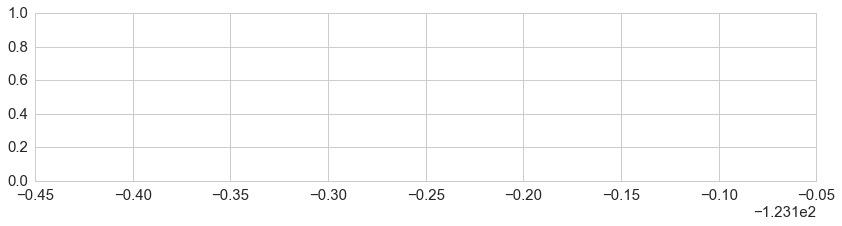

In [10]:
## the whole domain, weak winds + neap tides, oct 2~5
threshold_whole_domain2(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,48,143,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(octriver_T,octnowind_T,octnotide_T,\
                                                             octnof_T,octall_T,48,143,np_mask,10)

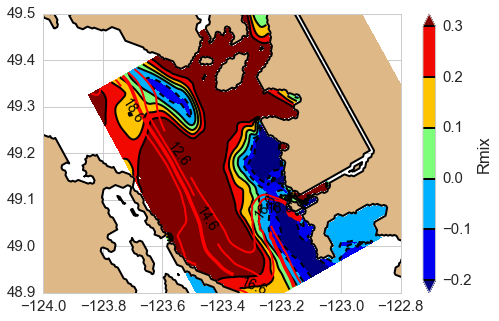

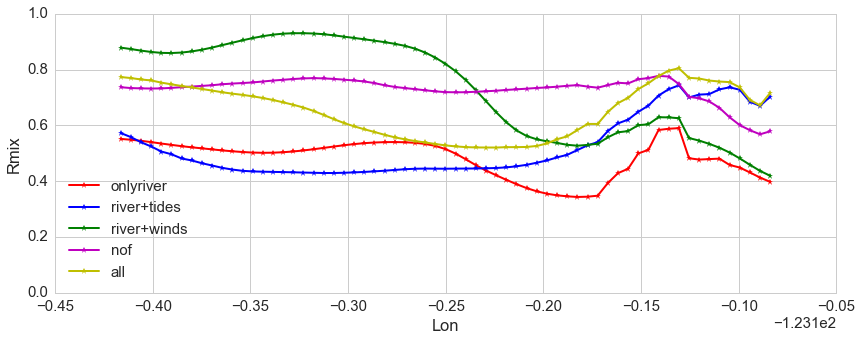

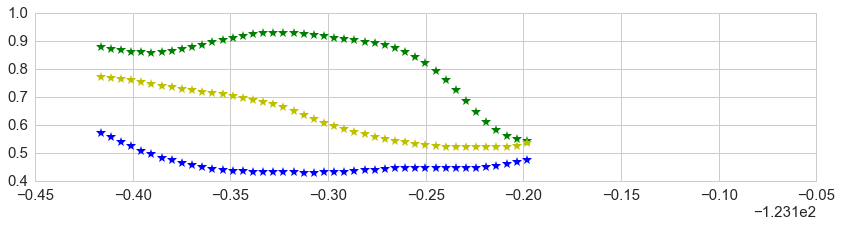

In [11]:
## the whole domain, weak winds + spring tides, may 9~11
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,192,263,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,192,263,np_mask,10)

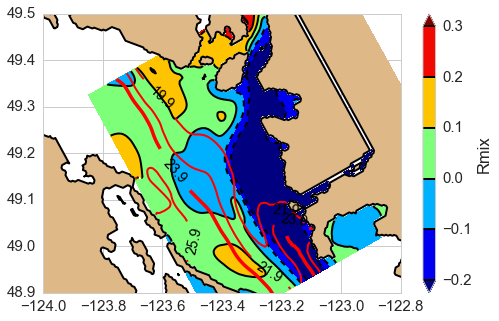

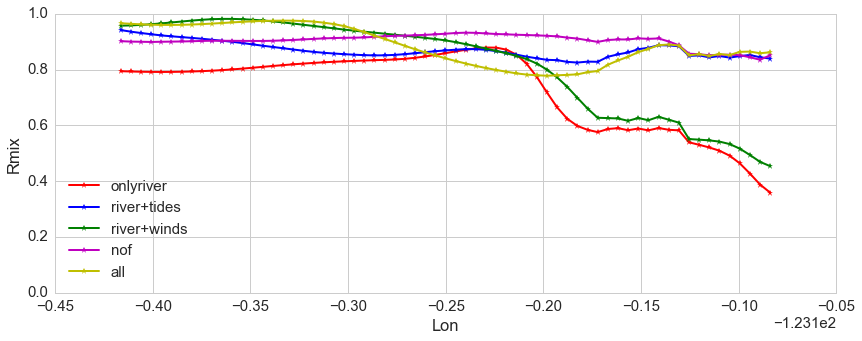

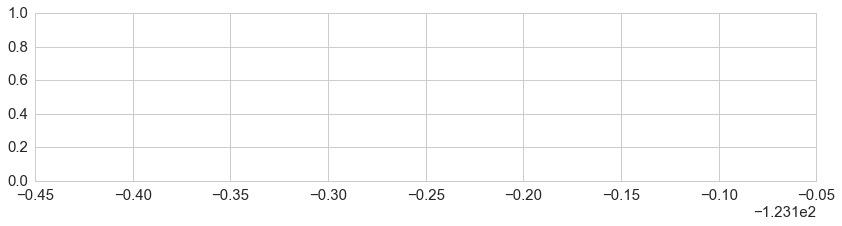

In [12]:
## the whole domain, weak winds + late neap tides, jan 8~10
threshold_whole_domain2(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,168,239,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(janriver_T,jannowind_T,jannotide_T,\
                                                             jannof_T,janall_T,168,239,np_mask,10)

* moderate wind

i,lon,real salinity 52 -123.267 26.8949
i,lon,real salinity 53 -123.262 26.6704
S_ref 27.7367
S_thre 26.8197989273
i,lon,real salinity 32 -123.371 22.5049
i,lon,real salinity 33 -123.366 22.276
S_ref 23.8765
S_thre 22.4191612244
i,lon,real salinity 35 -123.355 18.3831
i,lon,real salinity 36 -123.35 18.1294
i,lon,real salinity 46 -123.298 18.1085
i,lon,real salinity 47 -123.293 18.2393
i,lon,real salinity 54 -123.257 18.3885
i,lon,real salinity 55 -123.251 18.1596
i,lon,real salinity 57 -123.241 18.0621
S_ref 20.1906
S_thre 18.2172550964
i,lon,real salinity 58 -123.236 25.5461
i,lon,real salinity 59 -123.231 25.4949
i,lon,real salinity 60 -123.225 25.3431
S_ref 26.4876
S_thre 25.3958948135


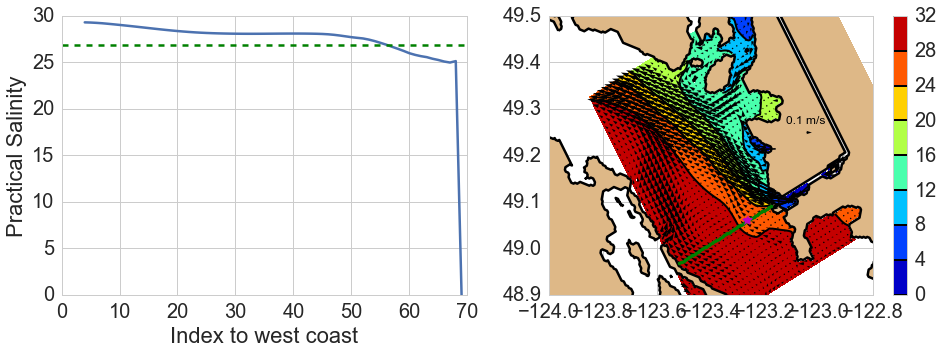

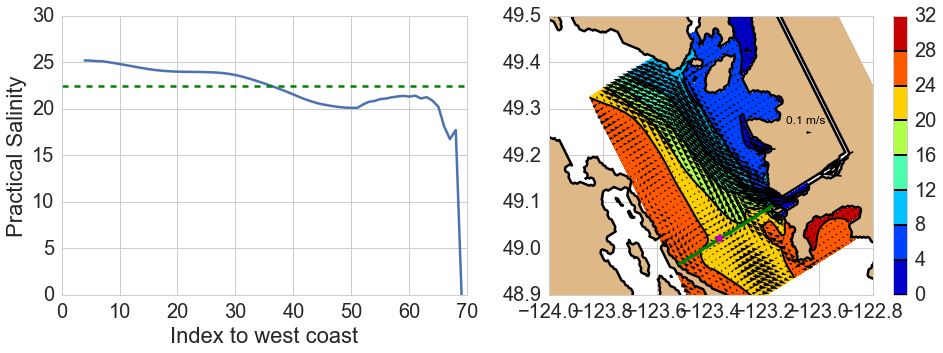

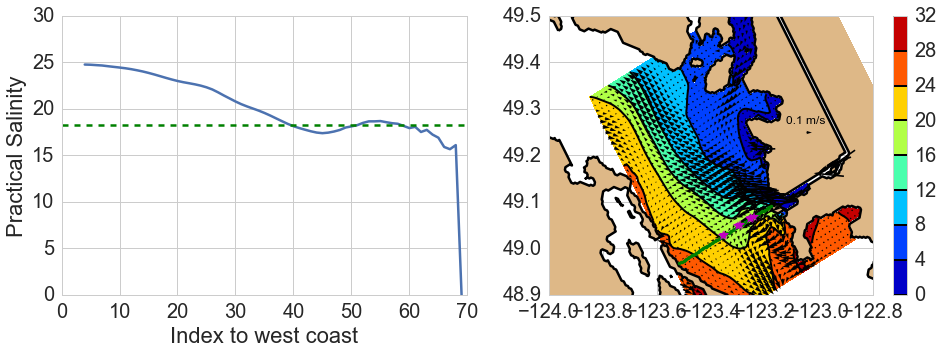

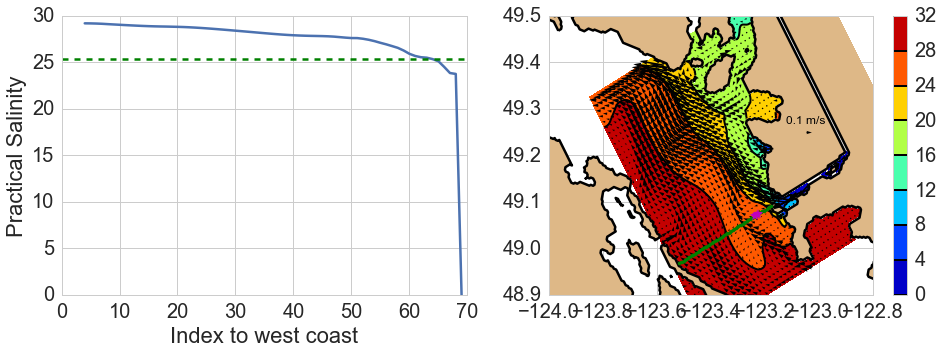

In [20]:
DEP.determine_plume_method2(octall_T,octall_U,octall_V,408,480,0,0.2) ## Oct 18~20, late spring to neap
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,288,359,0,0.2) ## May 13~15, neap tides
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,360,455,0,0.2) ## May 16~19, spring tides
DEP.determine_plume_method2(janall_T,janall_U,janall_V,384,455,0,0.2) ## Jan 17~19, late neap early spring 

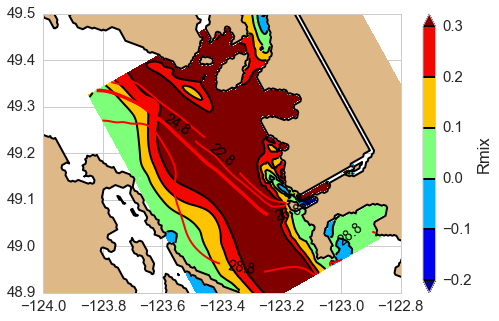

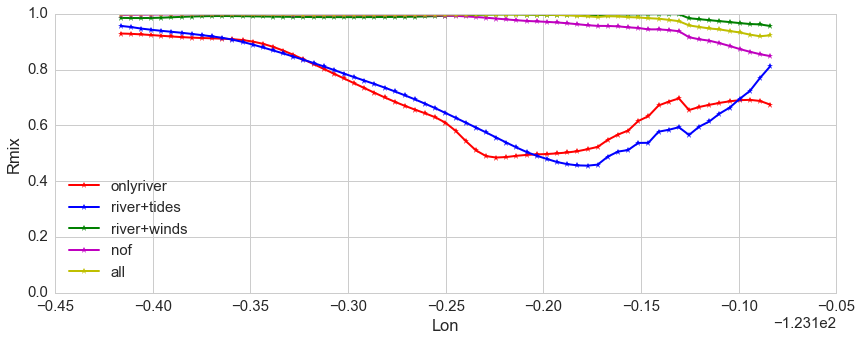

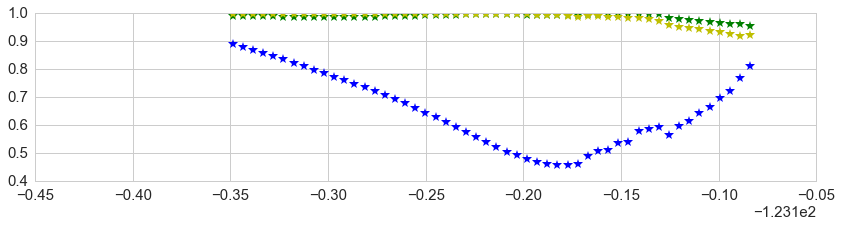

In [13]:
### the whole domain, moderate winds + late spring to neap, oct 18~20
threshold_whole_domain2(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,408,480,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(octriver_T,octnowind_T,octnotide_T,\
                                                             octnof_T,octall_T,408,480,np_mask,10)

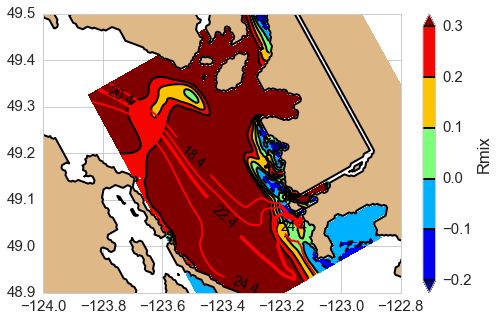

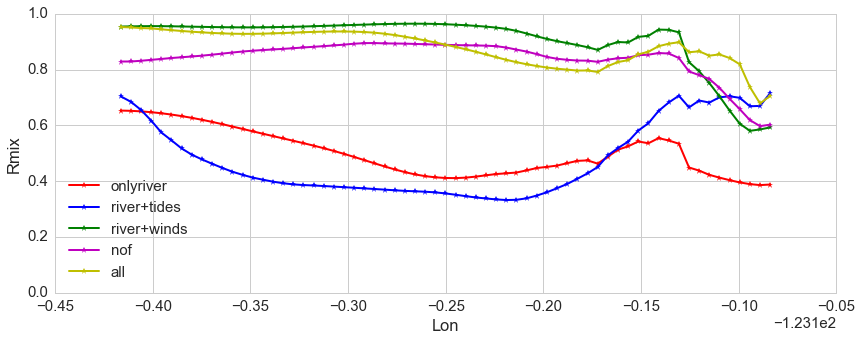

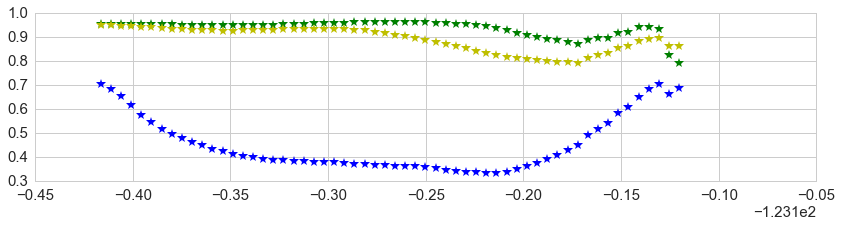

In [14]:
## the whole domain, moderate winds + neap tides, may 13~15
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,288,359,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,288,359,np_mask,10)

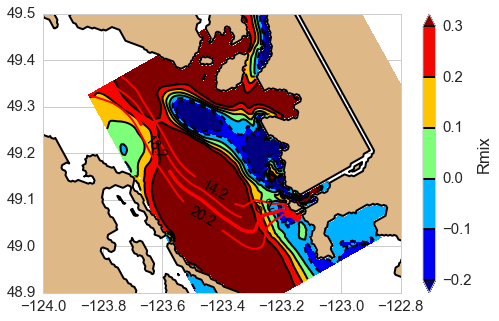

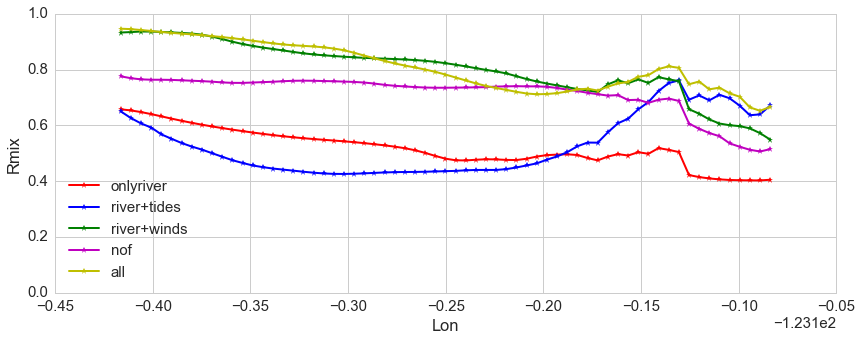

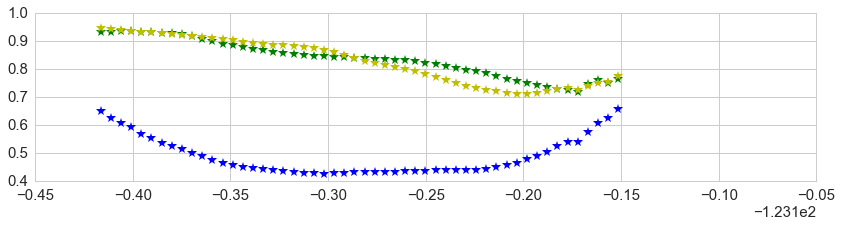

In [15]:
# the whole domain, moderate winds + spring tides, may 16~19
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,360,455,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,360,455,np_mask,10)

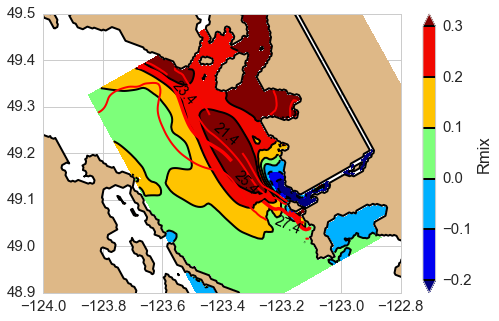

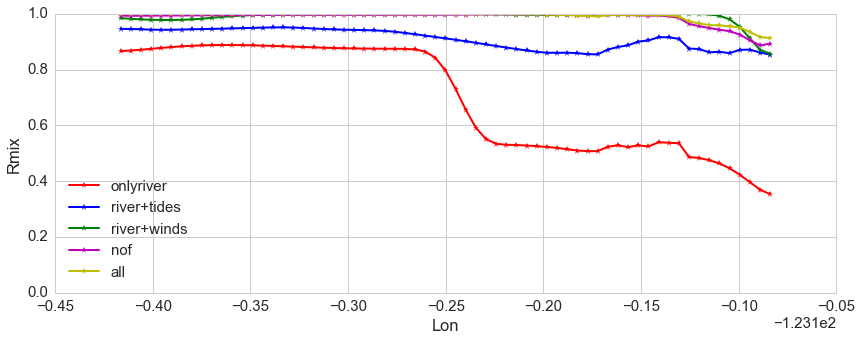

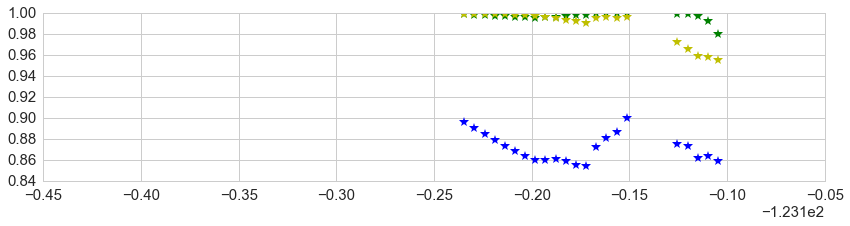

In [16]:
## NW wind blows the plume to NW, away from the river mouth region where mixing dominant by tides. That's why that 
## red blob exists (tide effect weak, wind-induced relatively strong then)
#moderate winds + late neap early spring tides, jan 17~19
threshold_whole_domain2(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,384,455,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(janriver_T,jannowind_T,jannotide_T,\
                                                             jannof_T,janall_T,384,455,np_mask,10)

* strong wind

i,lon,real salinity 44 -123.309 28.1728
i,lon,real salinity 45 -123.303 28.0463
i,lon,real salinity 46 -123.298 27.9612
i,lon,real salinity 47 -123.293 27.901
S_ref 28.811
S_thre 28.0444909286
S_ref 23.4999
S_thre 21.9898586655
i,lon,real salinity 18 -123.444 25.7039
i,lon,real salinity 19 -123.438 25.6032
i,lon,real salinity 20 -123.433 25.5273
i,lon,real salinity 21 -123.428 25.4859
i,lon,real salinity 22 -123.423 25.4853
i,lon,real salinity 23 -123.418 25.5286
i,lon,real salinity 24 -123.412 25.6098
i,lon,real salinity 25 -123.407 25.7063
i,lon,real salinity 26 -123.402 25.7908
i,lon,real salinity 52 -123.267 25.7141
i,lon,real salinity 53 -123.262 25.5304
S_ref 26.6591
S_thre 25.5914213562


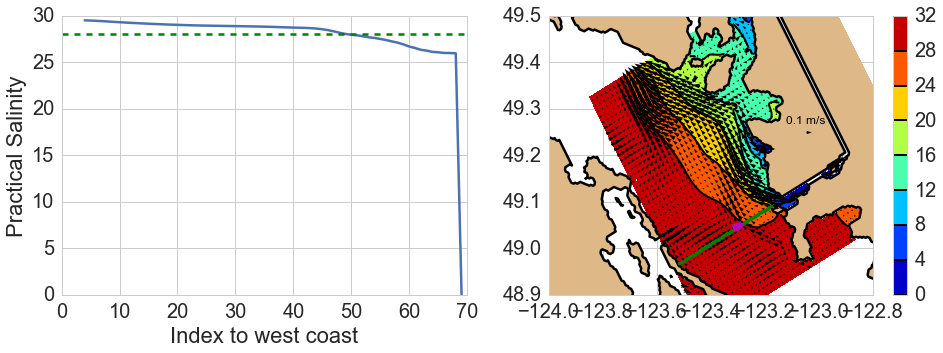

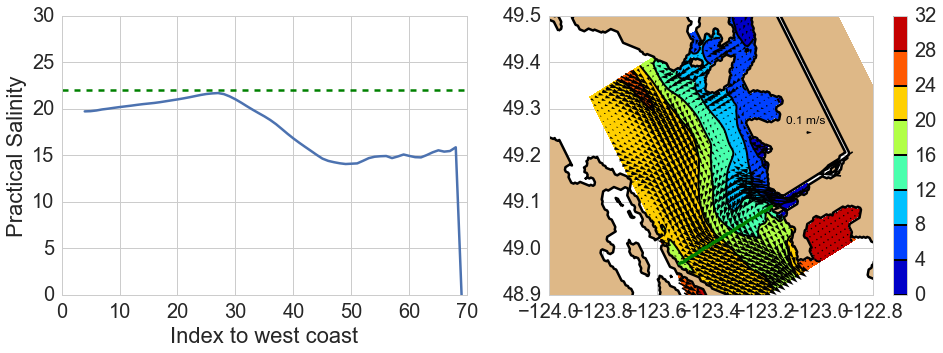

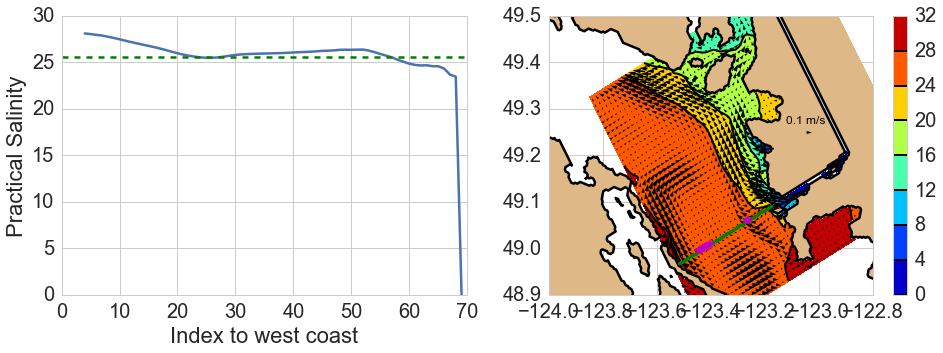

In [36]:
DEP.determine_plume_method2(octall_T,octall_U,octall_V,480,551,0,0.2) ## Oct 21~23, neap
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,24,95,0,0.2) ## May 2~4, early spring tides
DEP.determine_plume_method2(janall_T,janall_U,janall_V,624,671,0,0.2) ## Jan 21~23, spring tides

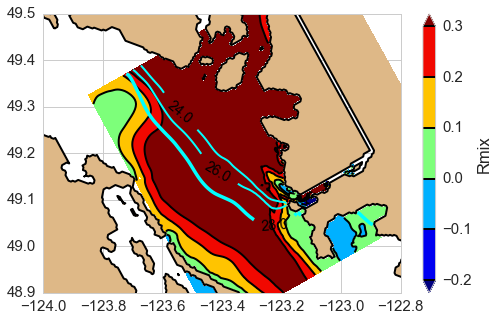

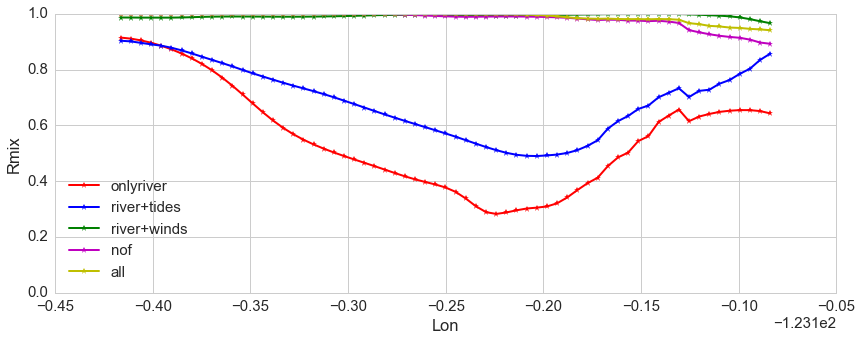

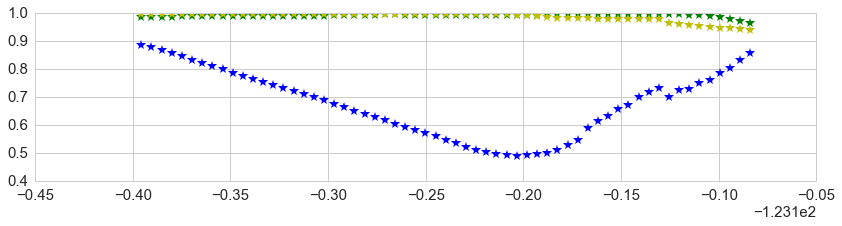

In [19]:
## the whole domain, strong winds + neap, oct 21~23
threshold_whole_domain2(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,480,551,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(octriver_T,octnowind_T,octnotide_T,\
                                                             octnof_T,octall_T,480,551,np_mask,10)

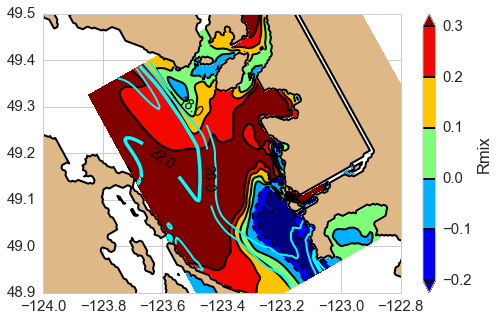

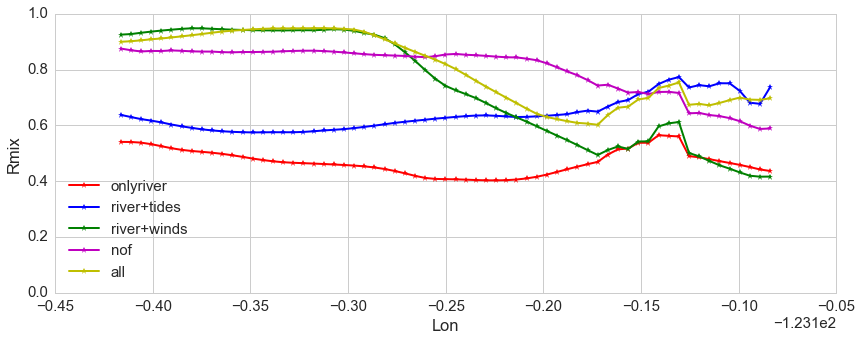

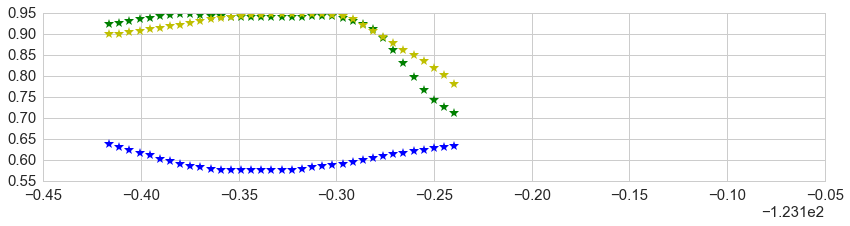

In [20]:
## the whole domain, strong winds + early spring tides, may 2~4
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,24,95,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,24,95,np_mask,10)

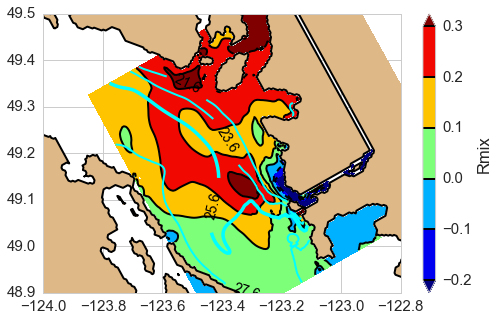

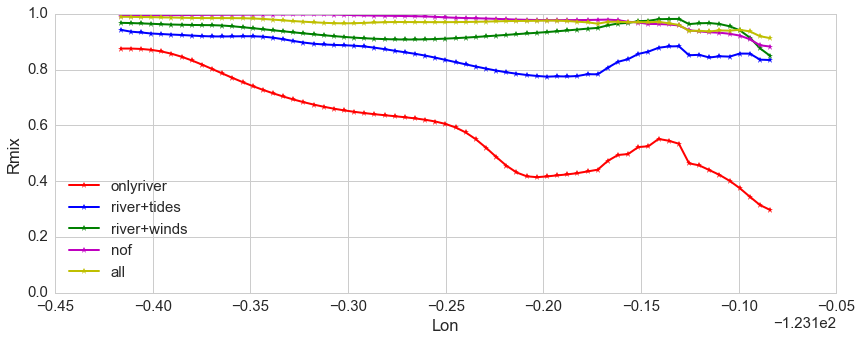

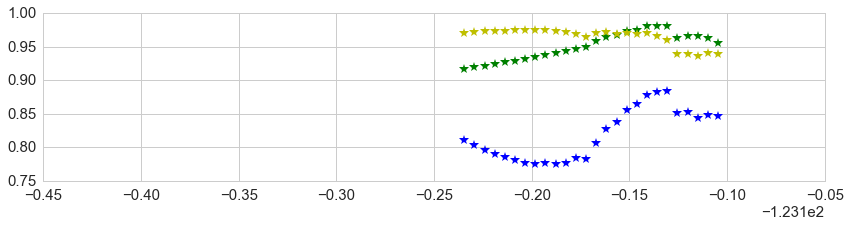

In [21]:
## the whole domain, strong winds + spring tides, jan 21~23
threshold_whole_domain2(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,624,671,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(janriver_T,jannowind_T,jannotide_T,\
                                                             jannof_T,janall_T,624,671,np_mask,10)

In [102]:
sites = {
    'Sandheads': {'lat': 49.10,'lon': -123.30,'j' : 46,'i' : 53},
    'Steveston':{
        'j': 44, ##424
        'i': 72, ##312
    },
    'VENUS East':{'lat': 49.0419, 'lon': -123.3176,'depth': 170, 'j': 36, 'i': 43},    
    'VENUS Central':{ 'lat': 49.0401,'lon': -123.4261, 'depth': 300, 'j': 44, 'i': 26 },
    'East':{'j':36,'i':60},
    'West':{'j':36,'i':20}}

In [101]:
lon = janall_T.variables['nav_lon']
lat = janall_T.variables['nav_lat']
lon[36,20]

-123.43324

In [68]:
def plot_onlystra(stn, dep_ind,grid_T1,grid_T2, grid_T3,grid_T4,tst,ted,\
                                smin = 0,smax = 36):
    S_stn = {}
    grid_Ts = [grid_T1,grid_T2, grid_T3,grid_T4]
    for grid_T,st in zip(grid_Ts,['onlyriver','nowind','notide','all']):
        S = grid_T.variables['vosaline']
        t = grid_T.variables['time_counter']
        dep_T = grid_T.variables['deptht']
        S_stn[st] = S[:,:,sites[stn]['j'],sites[stn]['i']]
        ## tmask
        mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
        tmask = mesh.variables['tmask'][0,:,sites[stn]['j']+380,sites[stn]['i']+240]
        np_mask = np.abs(1-tmask) 
        np_mask=np_mask +np.zeros(S_stn[st].shape) 
        S_stn[st] = np.ma.masked_array(S_stn[st],mask=np_mask) ## mask sal=0 by tmask
        time_inds = np.arange(S.shape[0]) ## Define time
    fig, axs = plt.subplots(2,2,figsize = (18,14))
    ## stratification
    for ax, st in zip([axs[0,0],axs[0,1],axs[1,0],axs[1,1]],['onlyriver','nowind','notide','all']):
        mesh = ax.contourf(time_inds, dep_T[:],np.transpose(S_stn[st][:]),np.arange(smin, smax+3, 3),cmap = 'jet')
        cbar=fig.colorbar(mesh,ax = ax)
        cbar.set_label('Practical Salinity')
        #ax.set_title(st+' stratification of '+'south of Sandheads')
        ax.set_ylim([dep_T[dep_ind], dep_T[0]])
        ax.set_xlim(time_inds[tst],time_inds[ted]+1)
        ax.set_xlabel('Time [hr]')
        ax.set_ylabel('Depth [m]')

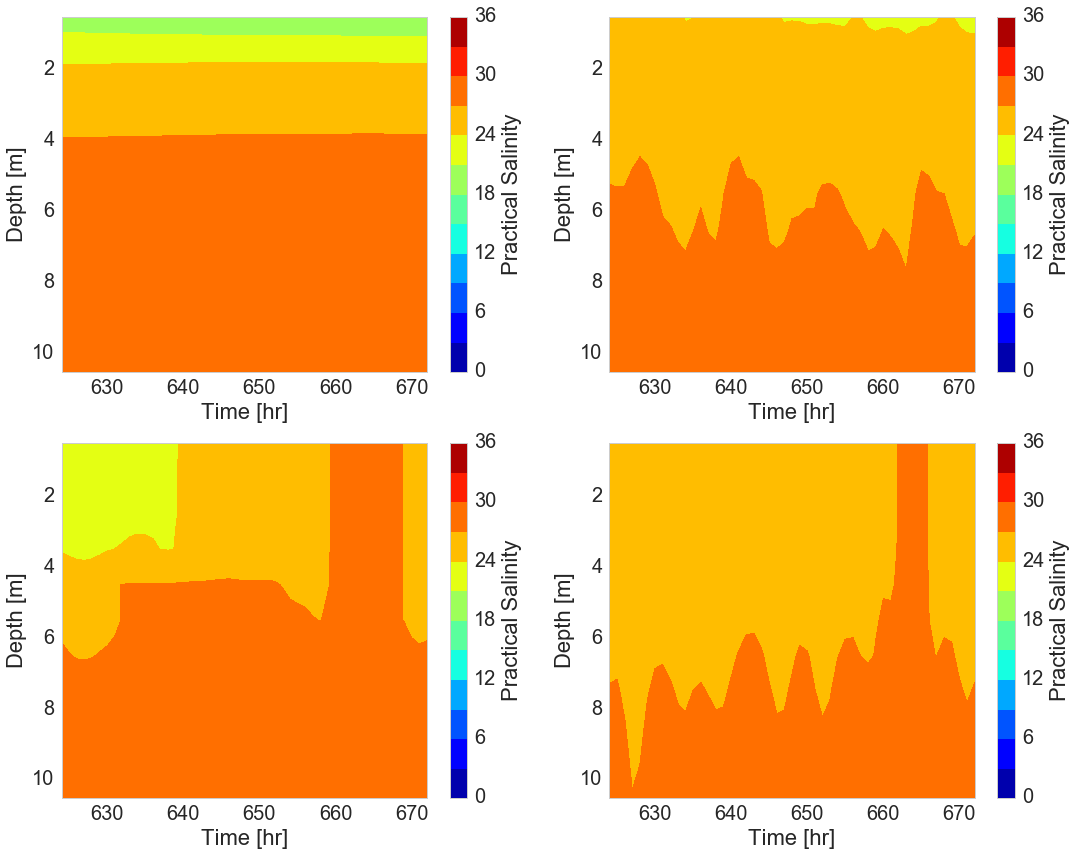

In [103]:
## check stratification to see if it is in far-field or spurious far-field
plot_onlystra('West',10,janriver_T,jannowind_T,jannotide_T,janall_T,624,671)

In [28]:
def rmix_each(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind):
    """This function was made to plot the averaged Rmix spatial pattern
    of each run case"""
    rmix = get_Rmix(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind)
    lon = all_T.variables['nav_lon']
    lat = all_T.variables['nav_lat']
    fig = plt.figure(figsize=(18,14))
    gs = gridspec.GridSpec(3, 2,width_ratios=[1,1], height_ratios=[1,1,1])  
    gs.update(hspace=0.2, wspace=0.1)
    levels = [0.1,0.3,0.5,0.7,0.9]
    for ti, ax in zip(['onlyriver','river+tides','river+winds','nof','all'],[fig.add_subplot(gs[0,0]),fig.add_subplot(gs[0,1]),\
                     fig.add_subplot(gs[1,0]),fig.add_subplot(gs[1,1]),fig.add_subplot(gs[2,0])]):
        CS = ax.contourf(lon[:],lat[:],rmix[ti],levels,cmap = 'jet',extend='both')
        CS2 = ax.contour(CS, colors = 'k',hold='on',linewidths=(2,))
        cbar = fig.colorbar(CS,ax = ax)
        cbar.add_lines(CS2)
        cbar.set_label('Rmix')
        viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
        viz_tools.plot_coastline(ax, grid6, coords = 'map')
        ax.set_title(ti)
        ax.set_xlim([-124.,-122.8])
        ax.set_ylim([48.9,49.5])

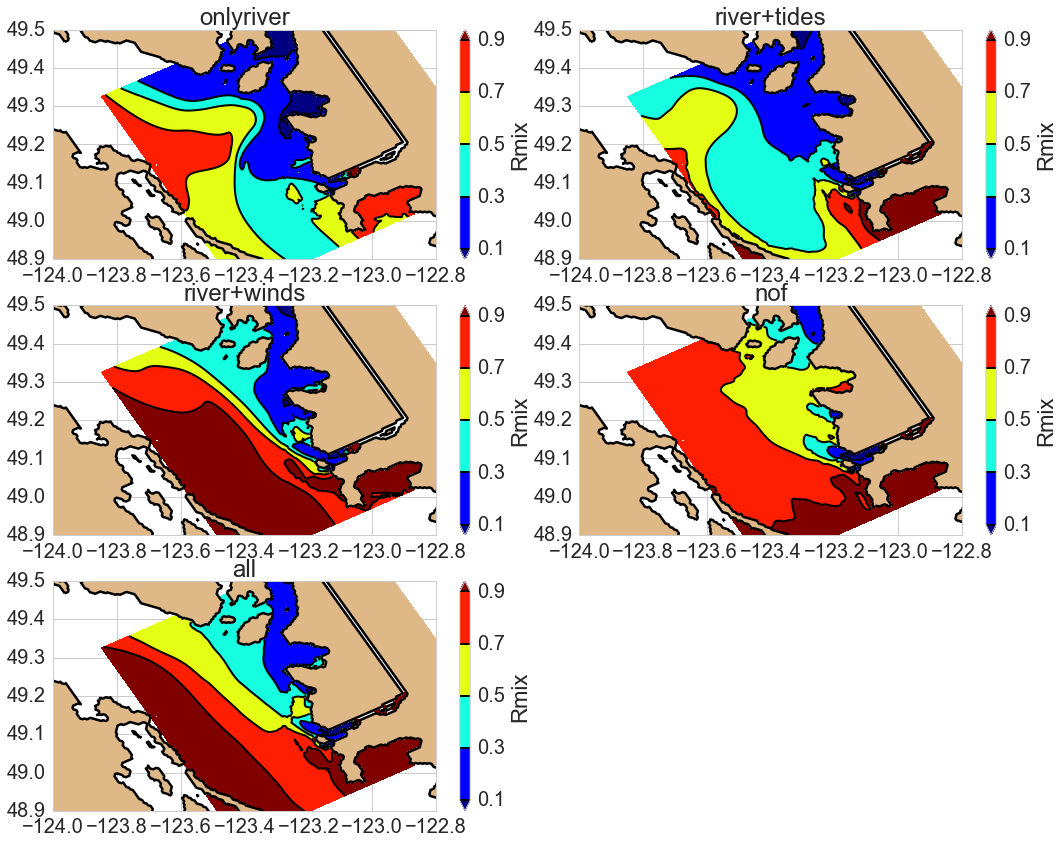

In [29]:
## moderate NW wind
rmix_each(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,288,359,10)

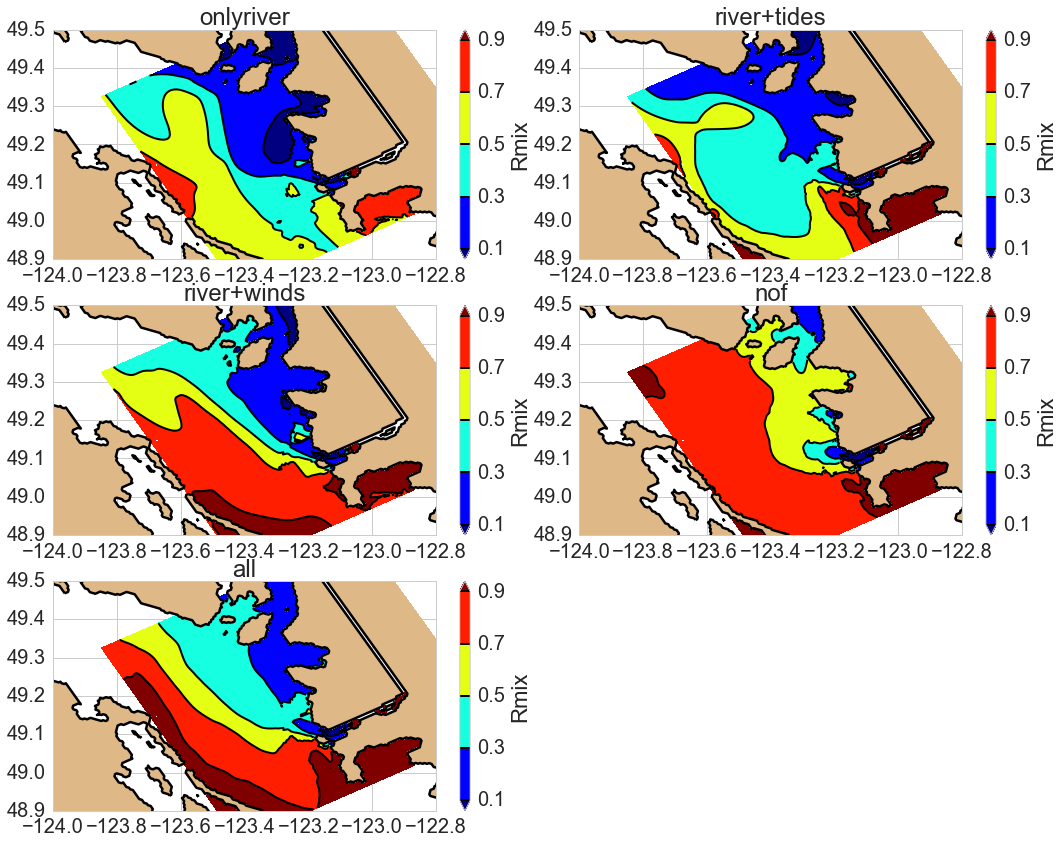

In [30]:
## mderate SE wind
rmix_each(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,360,455,10)

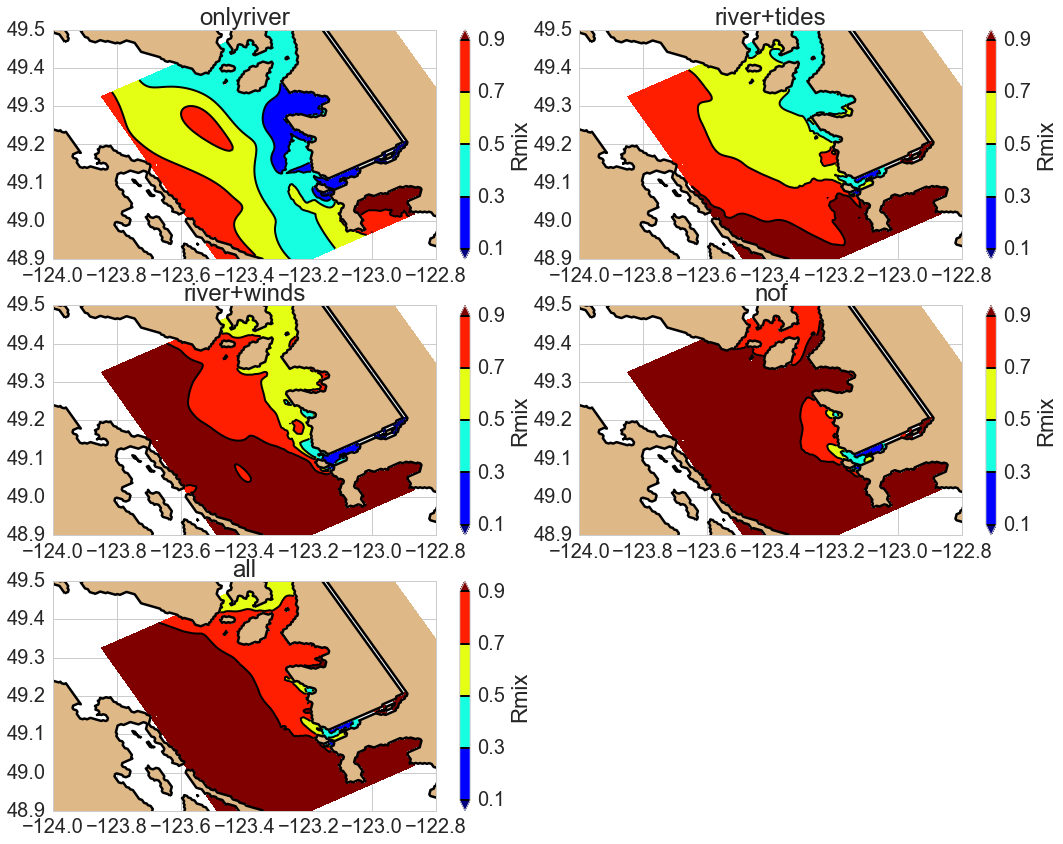

In [45]:
## strong wind jan
rmix_each(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,624,671,10)